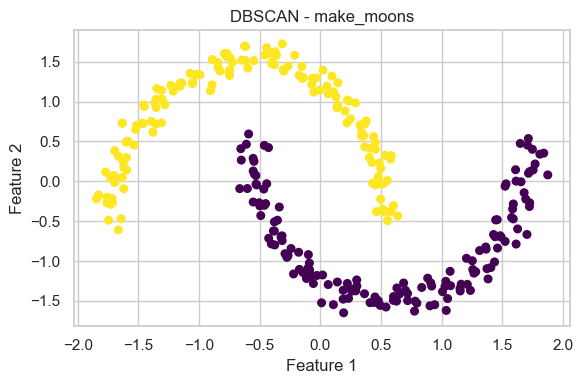

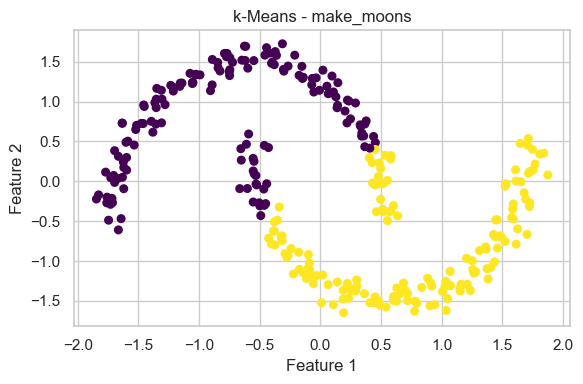

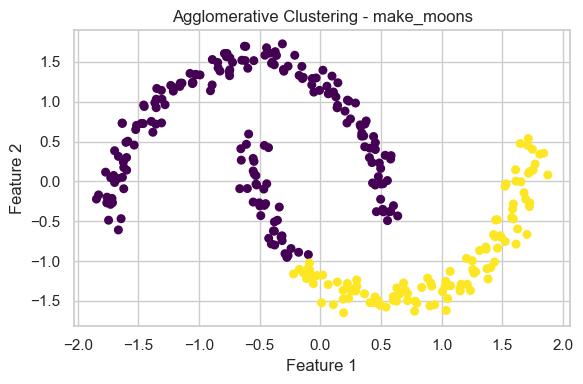

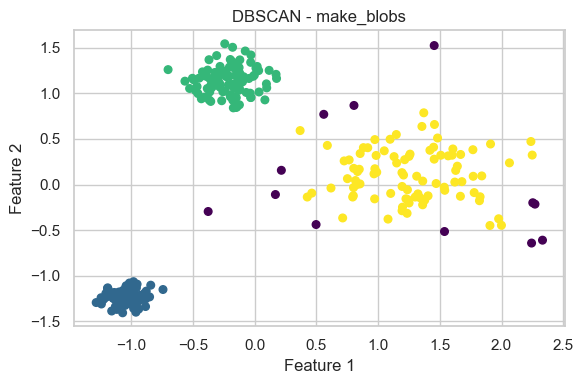

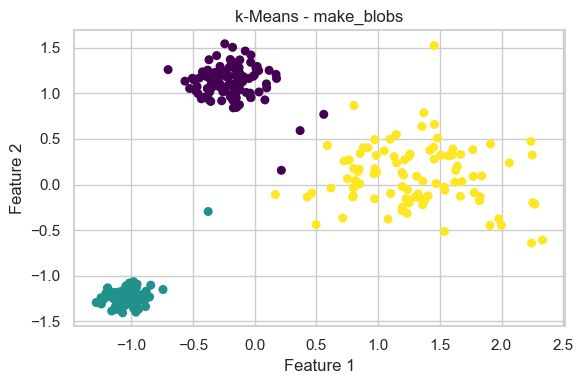

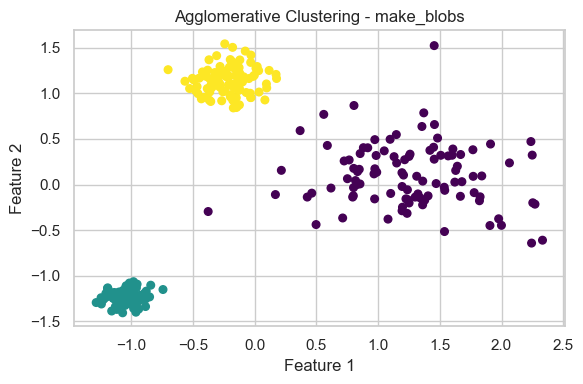


--- Algorithm Comparison Table ---

| Criterion                | k-Means                                | Hierarchical                    | DBSCAN                             |
|:-------------------------|:---------------------------------------|:--------------------------------|:-----------------------------------|
| Cluster Shape Assumption | Spherical                              | Flexible                        | Arbitrary shapes                   |
| Noise Handling           | Poor                                   | Poor                            | Excellent                          |
| Parameter Sensitivity    | Sensitive to k                         | Sensitive to linkage method     | Sensitive to eps/min_samples       |
| Scalability              | Fast                                   | Slower                          | Moderate                           |
| Best Use Case            | Well-separated, equal density clusters | Nested clusters, small datasets | Spatial data,

In [1]:
# Assignment 3: Clustering Algorithm Self-Study
# --------------------------------------------------
# Objective: Apply and compare DBSCAN with k-Means and Hierarchical Clustering

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# Helper function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

# ---------------------------
# Dataset 1: make_moons (DBSCAN performs well)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(X_moons)
plot_clusters(X_moons, db_labels, "DBSCAN - make_moons")

# k-Means
kmeans = KMeans(n_clusters=2, random_state=42)
km_labels = kmeans.fit_predict(X_moons)
plot_clusters(X_moons, km_labels, "k-Means - make_moons")

# Hierarchical
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_moons)
plot_clusters(X_moons, agg_labels, "Agglomerative Clustering - make_moons")

# ---------------------------
# Dataset 2: make_blobs with varying densities (DBSCAN struggles)
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_blobs = StandardScaler().fit_transform(X_blobs)

# DBSCAN
dbscan2 = DBSCAN(eps=0.3, min_samples=5)
db_labels2 = dbscan2.fit_predict(X_blobs)
plot_clusters(X_blobs, db_labels2, "DBSCAN - make_blobs")

# k-Means
kmeans2 = KMeans(n_clusters=3, random_state=42)
km_labels2 = kmeans2.fit_predict(X_blobs)
plot_clusters(X_blobs, km_labels2, "k-Means - make_blobs")

# Hierarchical
agg2 = AgglomerativeClustering(n_clusters=3)
agg_labels2 = agg2.fit_predict(X_blobs)
plot_clusters(X_blobs, agg_labels2, "Agglomerative Clustering - make_blobs")

# ---------------------------
# Algorithm Summary Table
comparison_table = {
    "Criterion": [
        "Cluster Shape Assumption",
        "Noise Handling",
        "Parameter Sensitivity",
        "Scalability",
        "Best Use Case"
    ],
    "k-Means": [
        "Spherical",
        "Poor",
        "Sensitive to k",
        "Fast",
        "Well-separated, equal density clusters"
    ],
    "Hierarchical": [
        "Flexible",
        "Poor",
        "Sensitive to linkage method",
        "Slower",
        "Nested clusters, small datasets"
    ],
    "DBSCAN": [
        "Arbitrary shapes",
        "Excellent",
        "Sensitive to eps/min_samples",
        "Moderate",
        "Spatial data, noise-heavy datasets"
    ]
}

import pandas as pd
comparison_df = pd.DataFrame(comparison_table)
print("\n--- Algorithm Comparison Table ---\n")
print(comparison_df.to_markdown(index=False))
